In [181]:
from bs4 import BeautifulSoup
import urllib
import requests
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [182]:
url = 'https://www.ebay.com/b/Other-Natural-Remedies/1279?Type=Ear%2520Candle%7CCandles%7CEssential%2520Oils%7CHerb%7CHerbal%2520Plaster%7CHerbs%7CHerbs%2520%2526%2520Resins%7CPendant%7CSalt%2520Pipe%7CSuppositories%7C%21%7CTea&rt=nc'
source = requests.get(url)
soup = BeautifulSoup(source.text, 'html.parser')
main_content = soup.find('ul', attrs = {'class':'b-list__items_nofooter srp-results srp-grid'})
items = main_content.find('div', attrs = {'class': 's-item__info clearfix'})

In [183]:
product_list = []
for i in range(1,144):
    source = requests.get('https://www.ebay.com/b/Other-Natural-Remedies/1279?Type=Ear%2520Candle%7CCandles%7CEssential%2520Oils%7CHerb%7CHerbal%2520Plaster%7CHerbs%7CHerbs%2520%2526%2520Resins%7CPendant%7CSalt%2520Pipe%7CSuppositories%7C%21%7CTea&rt=nc&_pgn={i}')
    for i in main_content.find_all('div', attrs = {'class': 's-item__info clearfix'}):
        product = i.find('h3', attrs={'class':'s-item__title'}).text.strip()
        info = i.find('span', attrs={'class': 's-item__price'}).text.strip()
        try:
            sold = i.find('span', attrs={'class':'NEGATIVE'}).text.strip()
        except:
            sold = 'none sold'
        products = {
            'product': product,
            'info': info,
            'amount sold': sold
        }
        
        product_list.append(products)

In [188]:
df = pd.DataFrame(product_list)

In [189]:
len(df)

6864

In [190]:
df.to_csv('ebay_product_analysis.csv')

In [205]:
df = pd.read_csv('ebay_product_analysis.csv')
df.head()

,Unnamed: 0,product,info,amount sold
0,0,"Cinnamon Hemp Oil Drops for Pain Relief, Stres...",$16.47,"2,510 sold"
1,1,Rastarafi® Whole Leaf Irish Moss Sea Moss 1 lb...,$25.95,none sold
2,2,EMPTY VEGETARIAN VEGI CELLULOSE CAPSULES - SI...,$4.99 to $13.99,"1,071 sold"
3,3,EMPTY GELATIN CAPSULES SIZE 00 BULK Gel Caps P...,$6.19 to $84.00,"2,372 sold"
4,4,"Pure Shilajit from Himalaya, Soft Resin, Extre...",$25.00,"3,908 sold"


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6864 entries, 0 to 6863
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   6864 non-null   int64 
 1   product      6864 non-null   object
 2   info         6864 non-null   object
 3   amount sold  6864 non-null   object
dtypes: int64(1), object(3)
memory usage: 214.6+ KB


In [207]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [208]:
df['info'] = df['info'].str.split('to')

In [212]:
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

In [213]:
df['info'] = df['info'].apply(punctuation_removal)

In [214]:
df['info']

0              1647
1              2595
2         499  1399
3         619  8400
4              2500
           ...     
6859    2995  13495
6860           3499
6861     1899  9999
6862           1895
6863           1999
Name: info, Length: 6864, dtype: object

## Cleaning the amount sold feature

In [215]:
df['amount sold'] = df['amount sold'].str.strip('sold')

In [216]:
df['amount sold'] = df['amount sold'].str.replace('none', '0')

In [217]:
df['amount sold'] = df['amount sold'].str.replace(',', '.')

In [218]:
df['amount sold']

0             2.510 
1                 0 
2             1.071 
3             2.372 
4             3.908 
            ...     
6859          2.445 
6860    Only 1 left!
6861            158 
6862              0 
6863              0 
Name: amount sold, Length: 6864, dtype: object

In [219]:
df['amount sold'] = pd.to_numeric(df['amount sold'], errors='coerce')

In [220]:
df['info'] = pd.to_numeric(df['info'], errors='coerce')

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6864 entries, 0 to 6863
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product      6864 non-null   object 
 1   info         3861 non-null   float64
 2   amount sold  6435 non-null   float64
dtypes: float64(2), object(1)
memory usage: 161.0+ KB


In [222]:
df.describe()

,info,amount sold
count,3861.000000,6435.000000
mean,2371.407407,154.600067
std,1582.954682,217.705265
min,698.000000,0.000000
25%,1399.000000,0.000000
50%,1900.000000,3.908000
75%,2595.000000,227.000000
max,8599.000000,804.000000


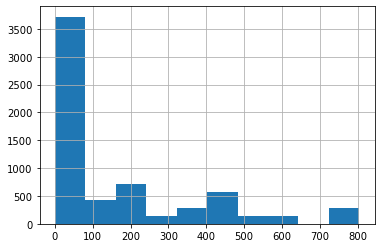

<AxesSubplot:>

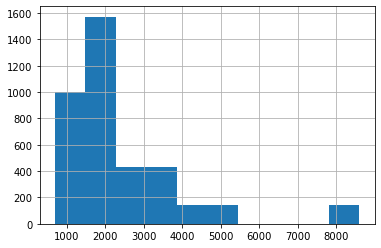

In [223]:
df['amount sold'].hist()
plt.show()
df['info'].hist()

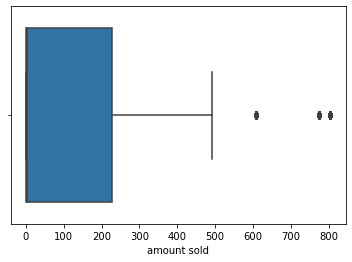

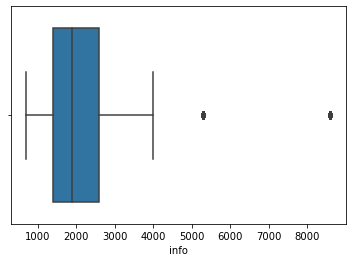

In [224]:
sns.boxplot(df['amount sold'])
plt.show()
sns.boxplot(df['info'])
plt.show()

In [225]:
df['info'].value_counts()

2000.0    286
1999.0    286
3499.0    286
1250.0    143
2595.0    143
2500.0    143
8599.0    143
698.0     143
5294.0    143
1350.0    143
1799.0    143
1880.0    143
1647.0    143
1000.0    143
1899.0    143
2295.0    143
1895.0    143
1900.0    143
3289.0    143
1149.0    143
3995.0    143
1399.0    143
999.0     143
1600.0    143
Name: info, dtype: int64

In [226]:
df['amount sold'].value_counts()

0.000      1716
417.000     143
1.674       143
1.897       143
166.000     143
2.943       143
356.000     143
57.000      143
1.464       143
423.000     143
399.000     143
2.510       143
162.000     143
609.000     143
491.000     143
804.000     143
3.908       143
2.708       143
50.000      143
41.000      143
225.000     143
283.000     143
773.000     143
93.000      143
429.000     143
2.011       143
439.000     143
115.000     143
1.071       143
2.372       143
158.000     143
2.445       143
215.000     143
227.000     143
Name: amount sold, dtype: int64

In [227]:
df.isnull()

,product,info,amount sold
0,False,False,False
1,False,False,False
2,False,True,False
3,False,True,False
4,False,False,False
...,...,...,...
6859,False,True,False
6860,False,False,True
6861,False,True,False
6862,False,False,False


In [228]:
df

,product,info,amount sold
0,"Cinnamon Hemp Oil Drops for Pain Relief, Stres...",1647.0,2.510
1,Rastarafi® Whole Leaf Irish Moss Sea Moss 1 lb...,2595.0,0.000
2,EMPTY VEGETARIAN VEGI CELLULOSE CAPSULES - SI...,NaN,1.071
3,EMPTY GELATIN CAPSULES SIZE 00 BULK Gel Caps P...,NaN,2.372
4,"Pure Shilajit from Himalaya, Soft Resin, Extre...",2500.0,3.908
...,...,...,...
6859,Oxy-Powder Colon Cleanser & Natural Laxative O...,NaN,2.445
6860,"Atrantil (90 Count): Bloating, Abdominal Disco...",3499.0,NaN
6861,All-Natural Organic Genital/Oral Herpes Cure T...,NaN,158.000
6862,Scabies Treatment Cream Lotion Medication Natu...,1895.0,0.000


In [229]:
datatoexcel = pd.ExcelWriter('FromPython.xlsx', engine='xlsxwriter')

In [230]:
df.to_excel(datatoexcel, sheet_name='sheet1')

In [231]:
datatoexcel.save()